In [4]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


In [7]:
#paste the copied path here yeta we used encoding='latin1' to avoid UnicodeDecodeError
df=pd.read_csv("/content/drive/MyDrive/train.csv",encoding='latin1')
#aba check if the dataset is loaded sucessfully by printing the first 5 rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


EDA
DATA EXPLORATION

In [8]:
#dataprofiling
# data kasto xa ani columns haru ko data-type bujhne
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


Based on the output of df.info() and df.isnull().sum():

The dataset has 891 entries and 12 columns.

In [9]:
print(df.value_counts())

PassengerId  Survived  Pclass  Name                                                 Sex     Age   SibSp  Parch  Ticket    Fare     Cabin        Embarked
2            1         1       Cumings, Mrs. John Bradley (Florence Briggs Thayer)  female  38.0  1      0      PC 17599  71.2833  C85          C           1
4            1         1       Futrelle, Mrs. Jacques Heath (Lily May Peel)         female  35.0  1      0      113803    53.1000  C123         S           1
7            0         1       McCarthy, Mr. Timothy J                              male    54.0  0      0      17463     51.8625  E46          S           1
11           1         3       Sandstrom, Miss. Marguerite Rut                      female  4.0   1      1      PP 9549   16.7000  G6           S           1
12           1         1       Bonnell, Miss. Elizabeth                             female  58.0  0      0      113783    26.5500  C103         S           1
                                                         

It lists rows in this DataFrame where all values in all columns are present (non-null).
For each unique combination of non-null values across all columns, it provides a count.
The output  provided shows a sample of these unique rows and their count, for a total of 183 such unique rows.
Since the counts for these combinations are all '1', it means that each of these fully populated rows is unique in itself across all features.

In [10]:
#check total missing values per column
print("missing values per column:")
print(df.isnull().sum())

missing values per column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


 There are missing values in the 'Age', 'Cabin', and 'Embarked' columns. 'Cabin' has a significant number of missing values (687 out of 891), 'Age' has 177 missing values, and 'Embarked' has 2 missing values. These missing values will need to be handled before building a model.

In [11]:
#Check for duplicates
print("Number of duplicates rows:",df.duplicated().sum())


Number of duplicates rows: 0


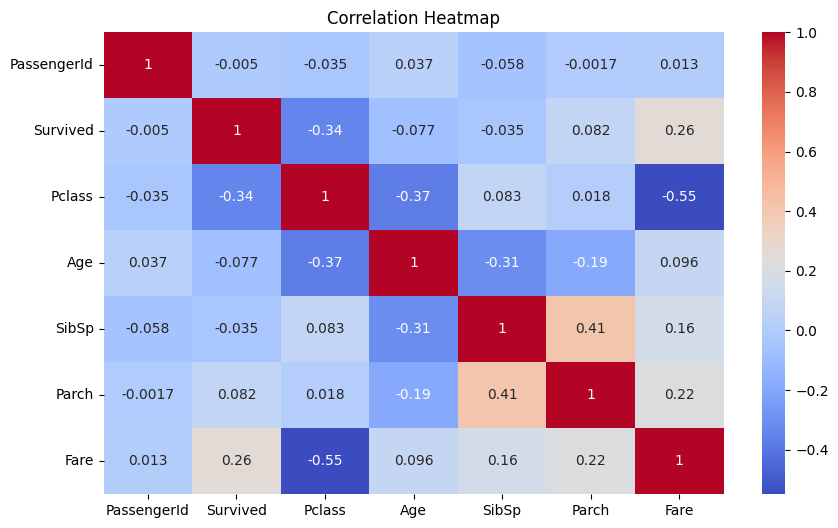

In [12]:
# Correlation matrix before any changes
# to show the difference between before and after EDA
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

DATA CLEANING

In [13]:
# In DSA we do not change the main dsa but make a copy of the main dataset then edit the copy
df_copy = df.copy()

In [14]:
# Check data types of each column
print(df_copy.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [15]:
print(df_copy.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


FEATURE ENGINEERING

In [16]:
#FEATUREENGINEERING
df_copy = df.copy()
# 1. Create a 'FamilySize' feature
df_copy['FamilySize'] = df_copy['SibSp'] + df_copy['Parch'] + 1
display(df_copy[['SibSp', 'Parch', 'FamilySize']].head())

,SibSp,Parch,FamilySize
0,1,0,2
1,1,0,2
2,0,0,1
3,1,0,2
4,0,0,1


This output shows:

SibSp: The number of siblings or spouses the passenger had aboard.
Parch: The number of parents or children the passenger had aboard.
FamilySize: The newly created feature, which is the sum of 'SibSp' and 'Parch' plus 1 (to include the passenger themselves).

For example, in the first row, the passenger had 1 sibling/spouse and 0 parents/children, resulting in a FamilySize of 1 + 0 + 1 = 2. In the third row, the passenger had 0 siblings/spouses and 0 parents/children, resulting in a FamilySize of 0 + 0 + 1 = 1 (meaning they were likely traveling alone).

This 'FamilySize' feature can be a useful predictor as it captures whether a passenger was traveling alone or with family, which might have influenced their survival rate.

In [17]:
# 2. Extract 'Title' from 'Name'
df_copy['Title'] = df_copy['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Display the counts of each title
print("Counts of each Title:")
print(df_copy['Title'].value_counts())

Counts of each Title:
Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Ms            1
Mme           1
Don           1
Lady          1
Sir           1
Capt          1
Countess      1
Jonkheer      1
Name: count, dtype: int64


The distribution of titles can provide insights into the passenger demographics and potentially correlate with survival rates. For example, 'Master' often refers to young boys, and we might investigate if this group had a higher survival rate.

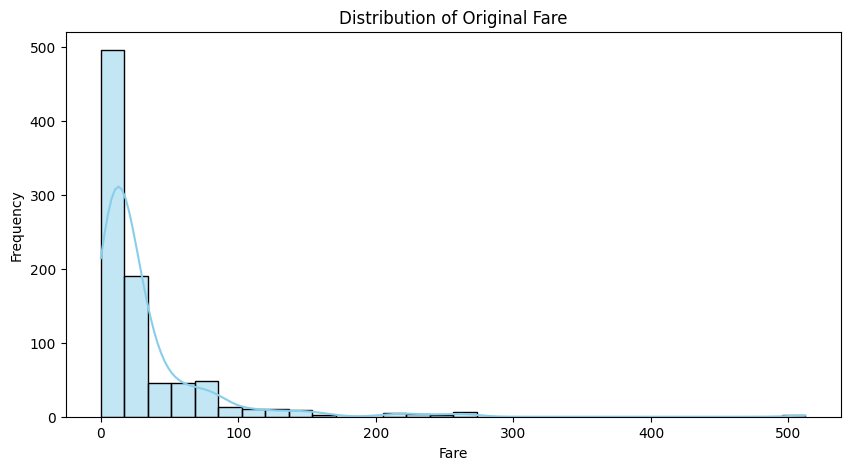

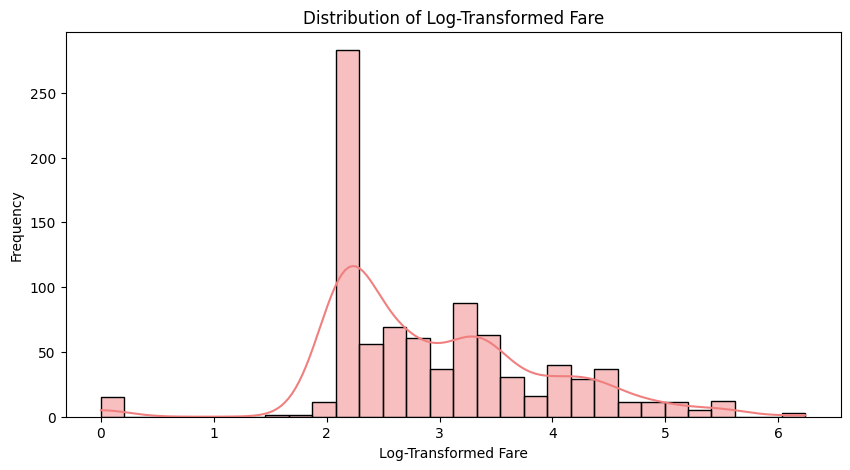

,Fare,Fare_log
0,7.2500,2.110213
1,71.2833,4.280593
2,7.9250,2.188856
3,53.1000,3.990834
4,8.0500,2.202765


In [18]:
# Visualize the distribution of the original 'Fare'
plt.figure(figsize=(10, 5))
sns.histplot(df_copy['Fare'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Original Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

# Apply a log transformation to handle skewness (add 1 to handle zero values)
df_copy['Fare_log'] = np.log1p(df_copy['Fare'])

# Visualize the distribution of the log-transformed 'Fare'
plt.figure(figsize=(10, 5))
sns.histplot(df_copy['Fare_log'], kde=True, bins=30, color='lightcoral')
plt.title('Distribution of Log-Transformed Fare')
plt.xlabel('Log-Transformed Fare')
plt.ylabel('Frequency')
plt.show()

# Display the first few rows with the new 'Fare_log' column
display(df_copy[['Fare', 'Fare_log']].head())

Right skewed curve is seen.

DATA VISUALIZATION

“what each feature looks like”“how features relate to quality,” and end with “what matters most.”

Univariate Analysis understanding the distribution of each numerical feature in our dataset to understand the distribution (normal, skewed, uniform, etc.) and Easily visualize outliers and data spread (IQR) with the goal to Spot outliers, skewness, and the spread of values and Detect extreme values that might affect models.


> Add blockquote



In [19]:
# Import Libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
#  Set Seaborn theme
sns.set(style="whitegrid")

# Define the list of numerical features
features = ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


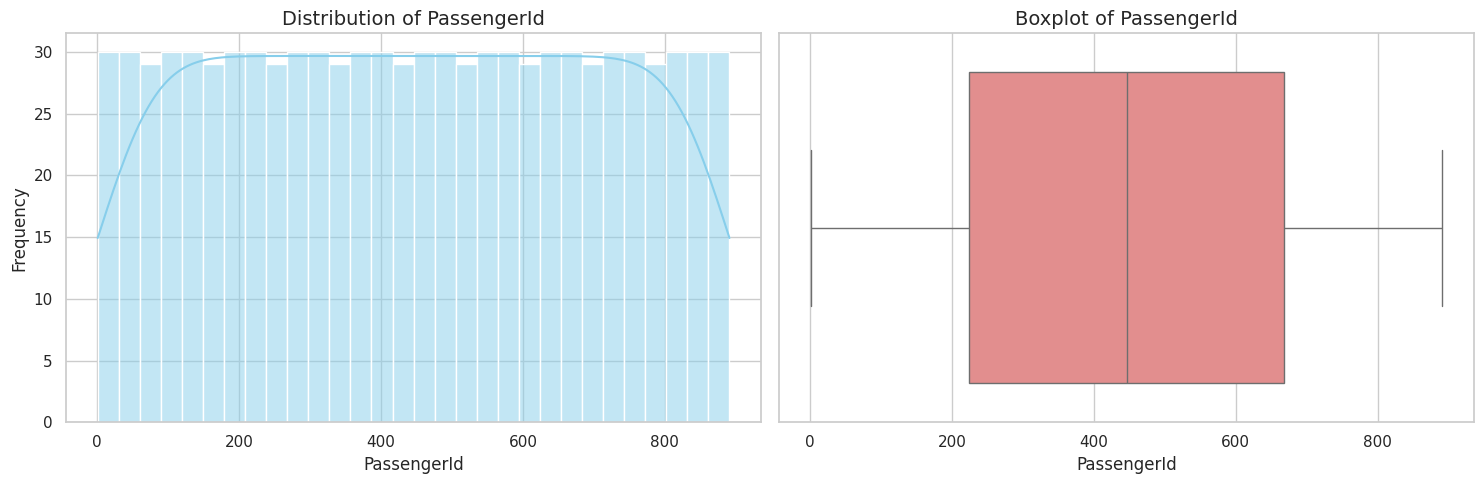

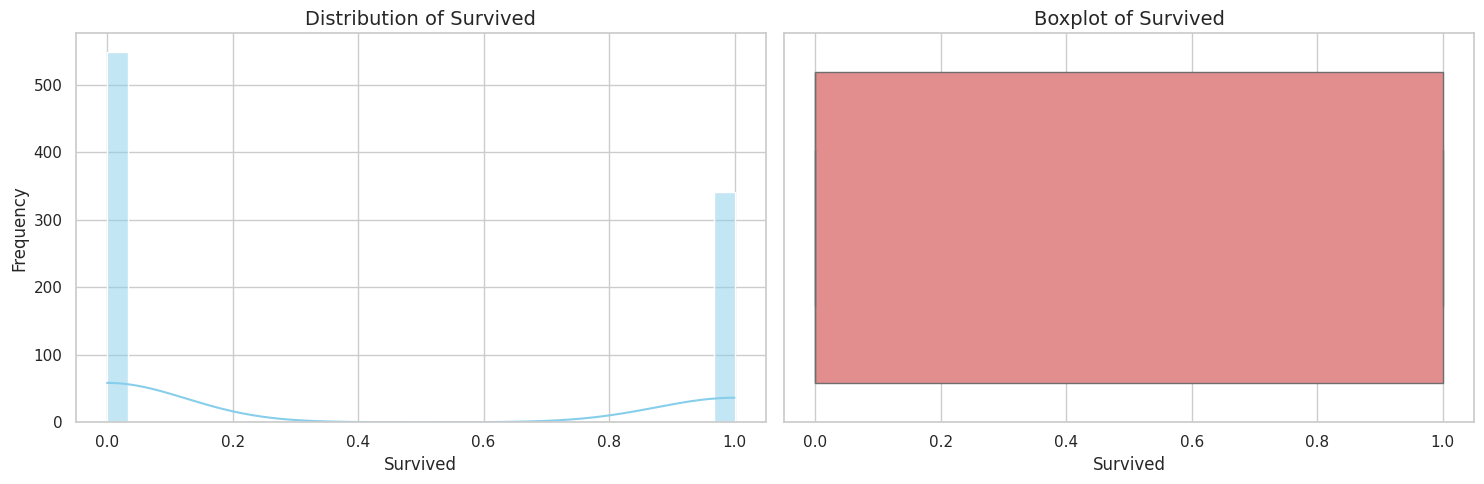

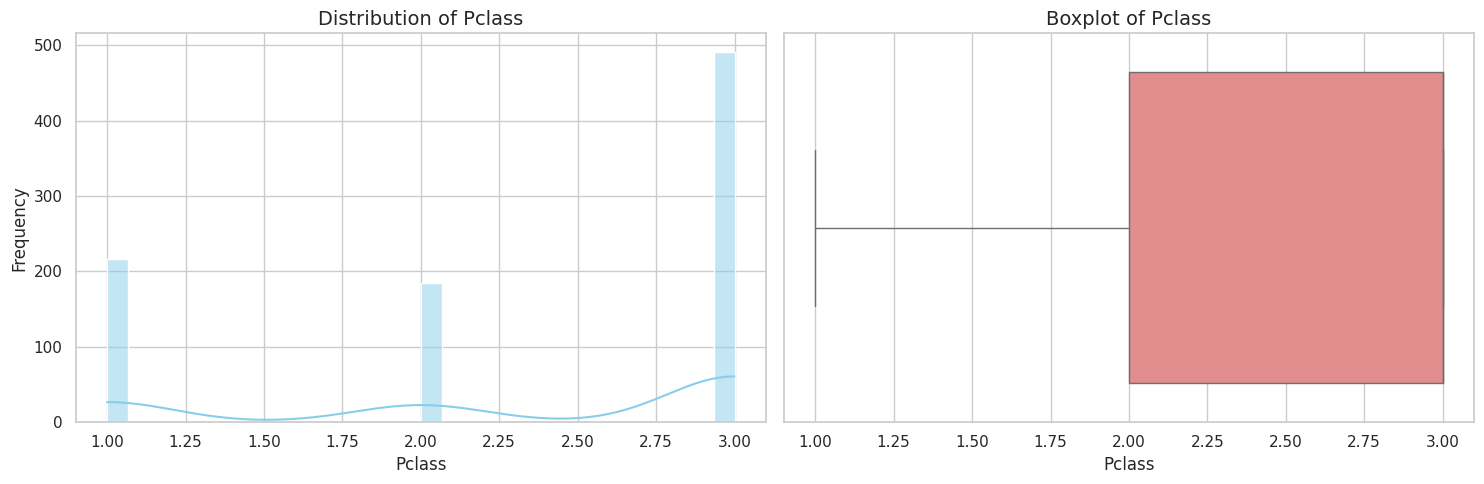

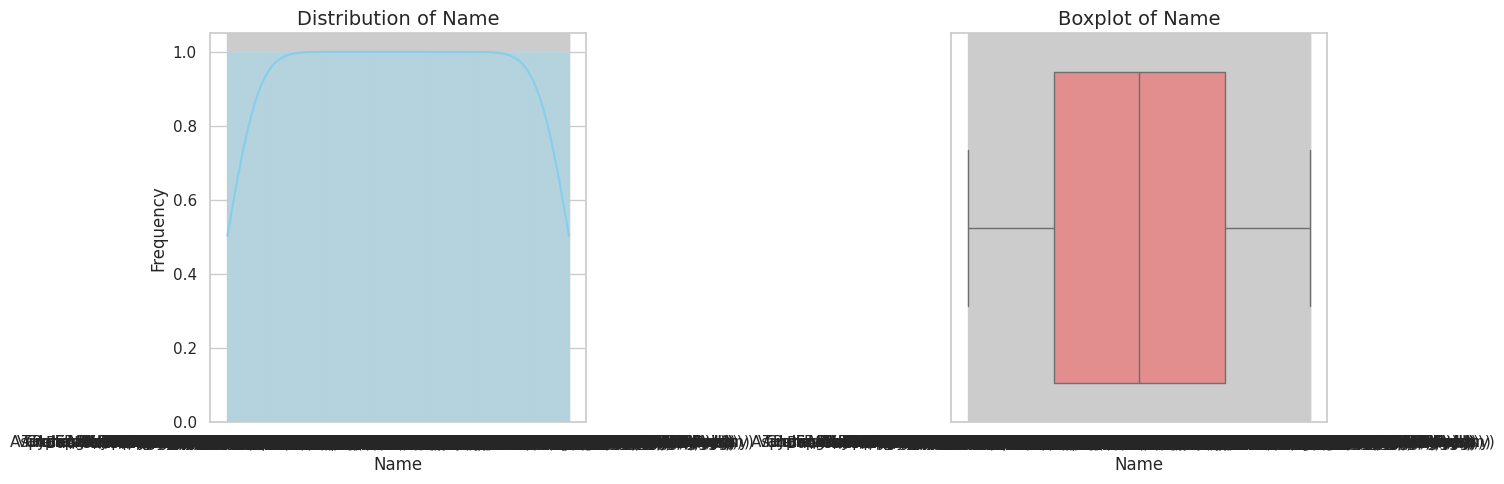

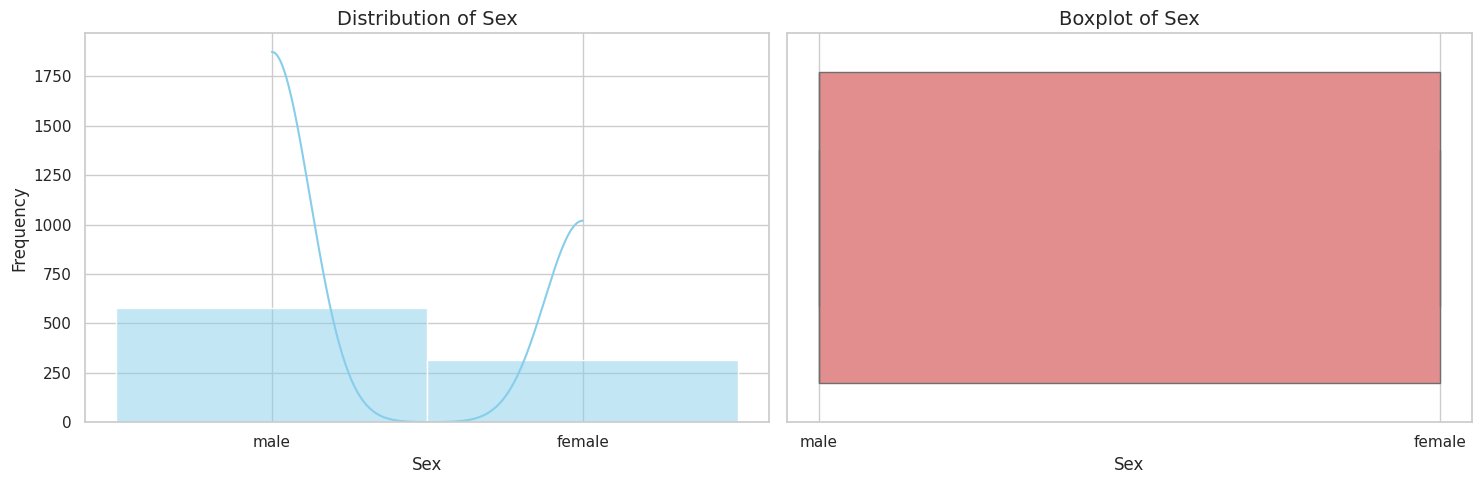

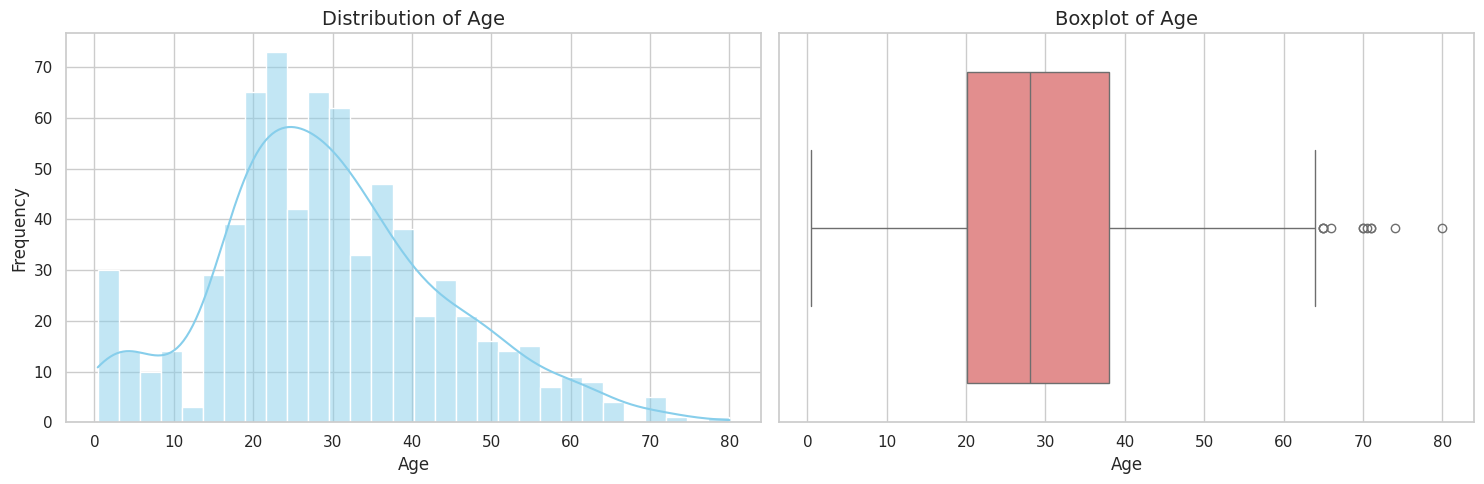

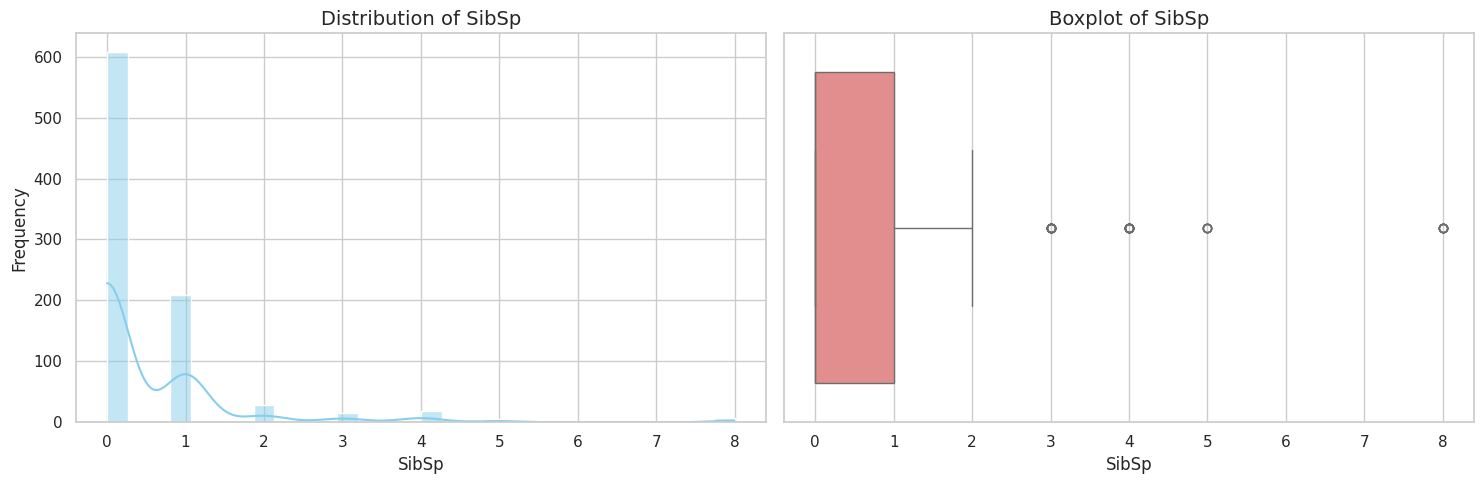

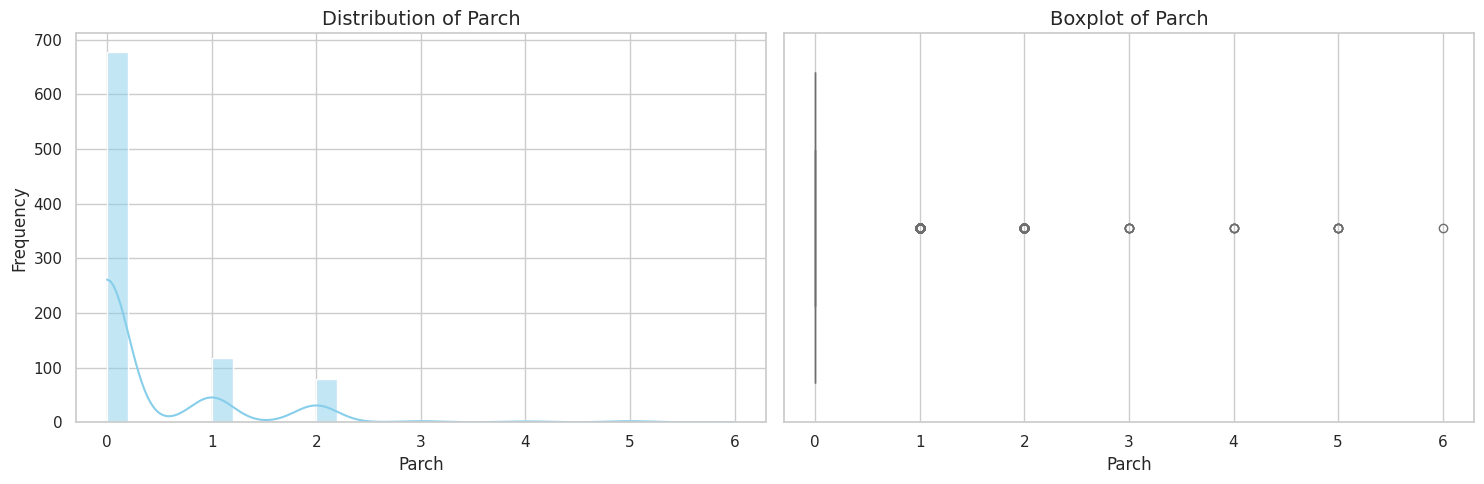

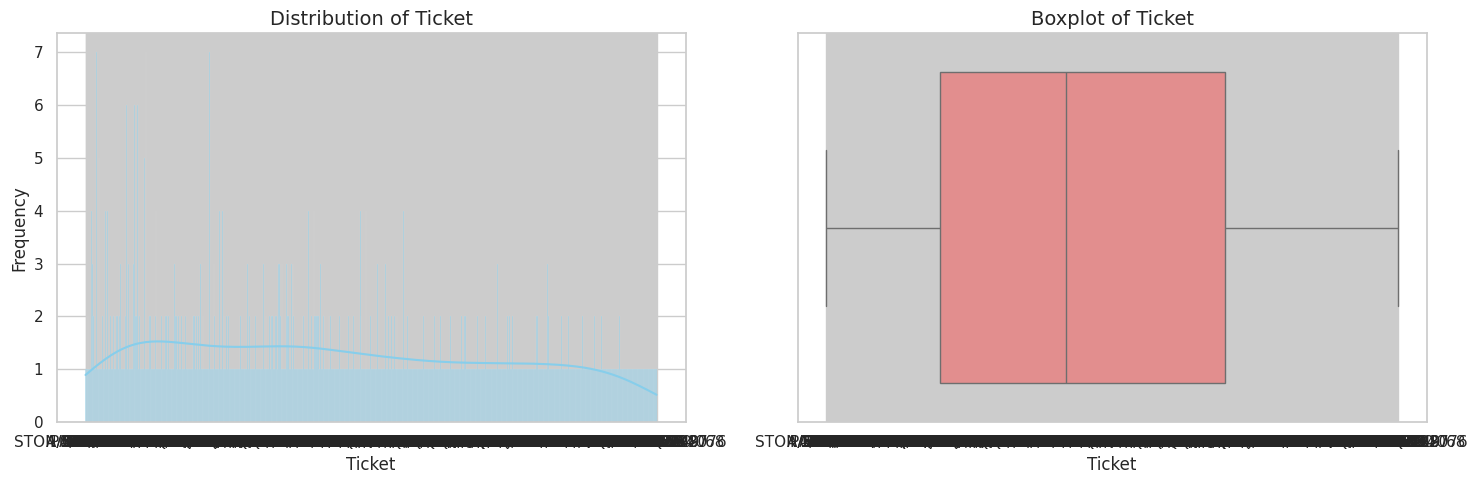

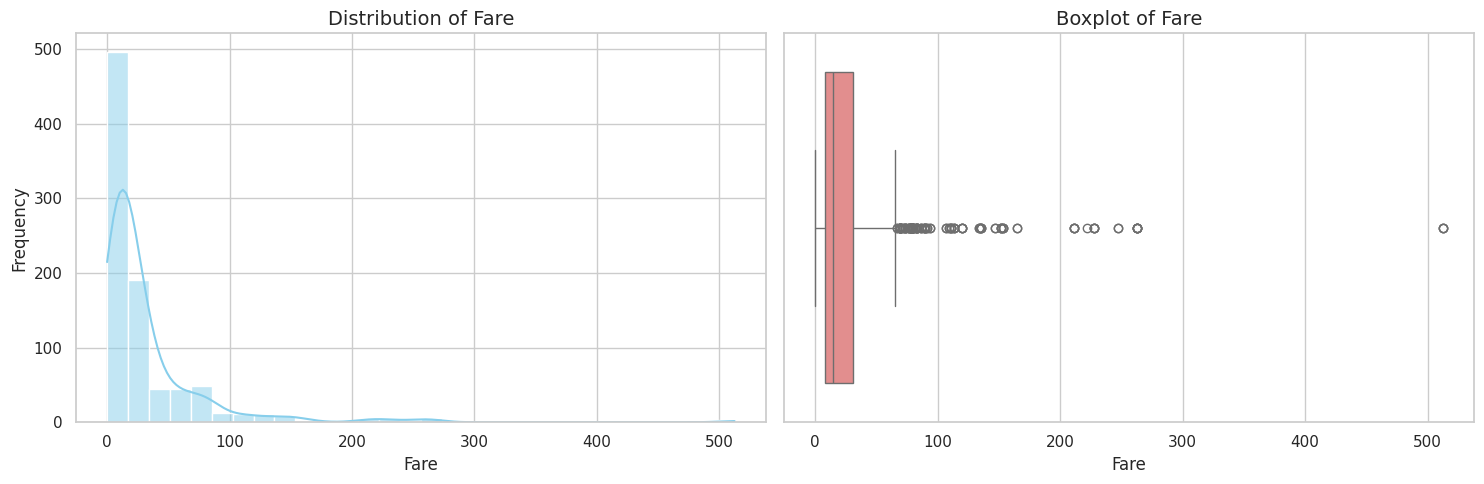

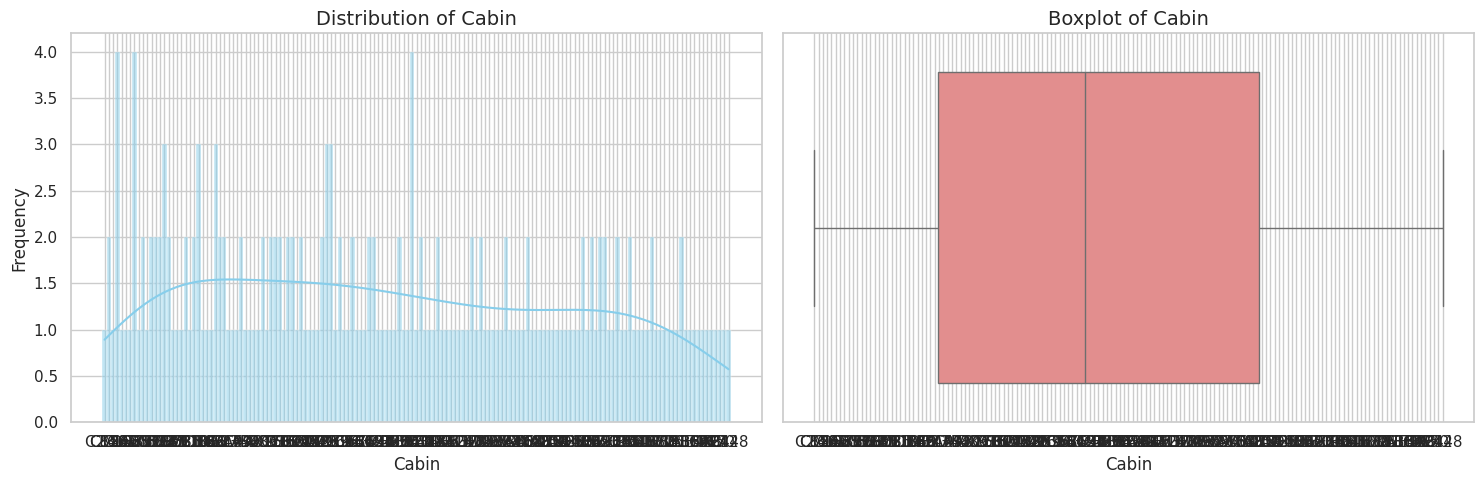

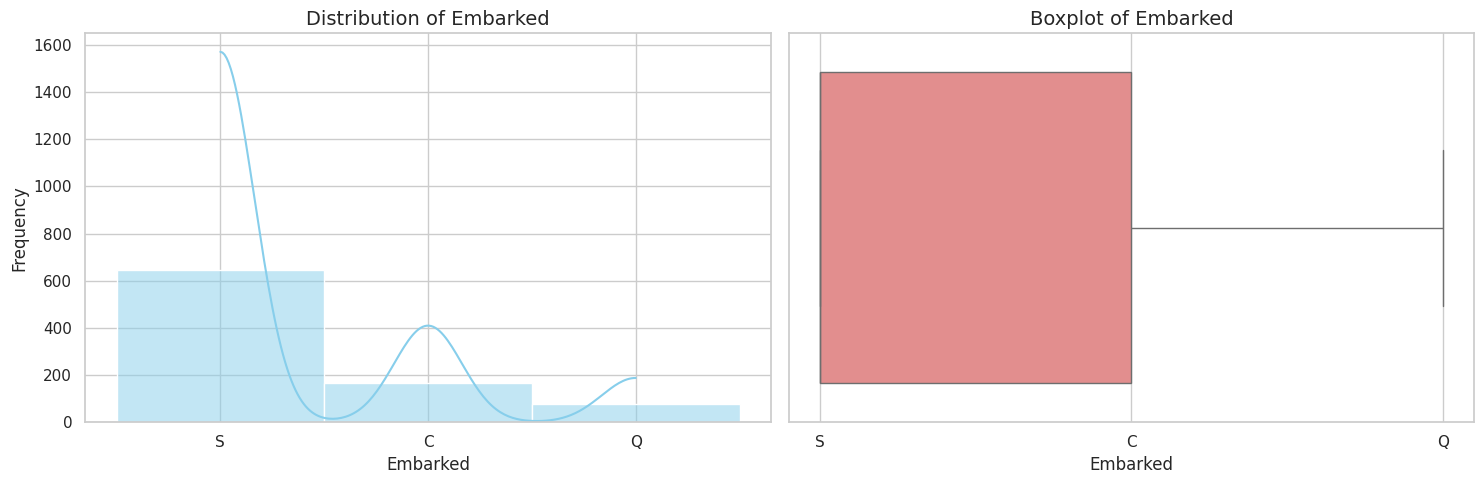

In [21]:
#  Loop through each feature and create plots
for feature in features:
    plt.figure(figsize=(15, 5))  # Wider figure for side-by-side plots

    #Histogram with KDE
    plt.subplot(1, 2, 1)
    sns.histplot(df_copy[feature], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {feature}', fontsize=14)
    plt.xlabel(feature)
    plt.ylabel('Frequency')

    # Boxplot for Outlier Detection
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df_copy[feature], color='lightcoral')
    plt.title(f'Boxplot of {feature}', fontsize=14)
    plt.xlabel(feature)

    plt.tight_layout()
    plt.show()

In [22]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for 'Fare'
Q1 = df_copy['Fare'].quantile(0.25)
Q3 = df_copy['Fare'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df_copy[(df_copy['Fare'] < lower_bound) | (df_copy['Fare'] > upper_bound)]

print(f"Number of outliers in 'Fare' using IQR: {len(outliers)}")
print(f"Lower Bound: {lower_bound:.2f}")
print(f"Upper Bound: {upper_bound:.2f}")

# Option 1: Cap the outliers (replace values outside bounds with the bounds)
df_copy['Fare_capped'] = df_copy['Fare'].clip(lower=lower_bound, upper=upper_bound)

# Display the first few rows with original and capped 'Fare'
display(df_copy[['Fare', 'Fare_capped']].head())

Number of outliers in 'Fare' using IQR: 116
Lower Bound: -26.72
Upper Bound: 65.63


,Fare,Fare_capped
0,7.2500,7.2500
1,71.2833,65.6344
2,7.9250,7.9250
3,53.1000,53.1000
4,8.0500,8.0500


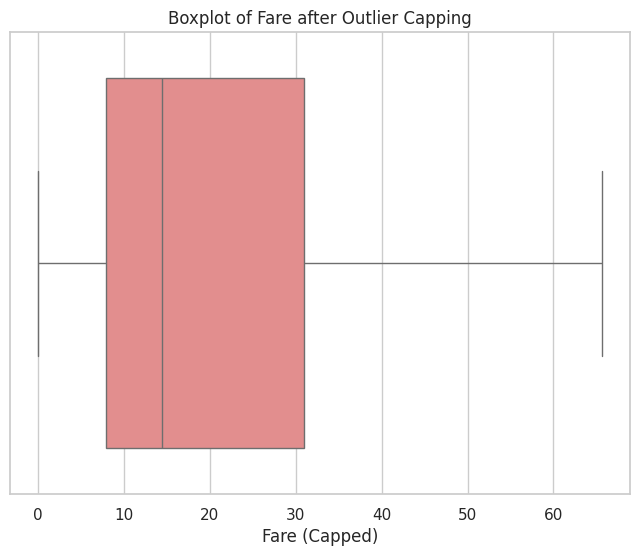

In [23]:
#outliers handling
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_copy['Fare_capped'], color='lightcoral')
plt.title('Boxplot of Fare after Outlier Capping')
plt.xlabel('Fare (Capped)')
plt.show()

Histogram/KDE

Is it normal, skewed, or uniform?

Is there a clear central value or mode?

Are there multiple peaks (bimodal)?

Boxplot

Where’s the median?

Are there many outliers?

Is the box tight (low spread) or wide (high variance)?

 Understand Correlation (Multivariate Analysis) ➤ Heatmap of the Correlation Matrix What: Show correlation coefficients between all numerical features.

Why: Helps identify strongly related features (positive/negative).

Goal: Detect multicollinearity or features highly correlated with quality. Check Feature Importance Visually ➤ Bar plots What: Mean values of each feature grouped by quality.

Why: See which features increase or decrease with quality.

 Pairwise Relationships (Optional) ➤ Pair Plot / Scatterplot Matrix What: Several scatterplots of feature pairs.

Why: To visually spot clusters, trends, or potential feature groupings.

Caution: Can be overwhelming with too many features.
 Visualizing Categorical Target ➤ Count Plot / Bar Plot What: Frequency of each wine quality level.

Why: To see class imbalance in your target variable

Understand Relationships Between Features (Bivariate Analysis) To identify potential correlations or patterns (e.g., linear, clustered).


[ ]


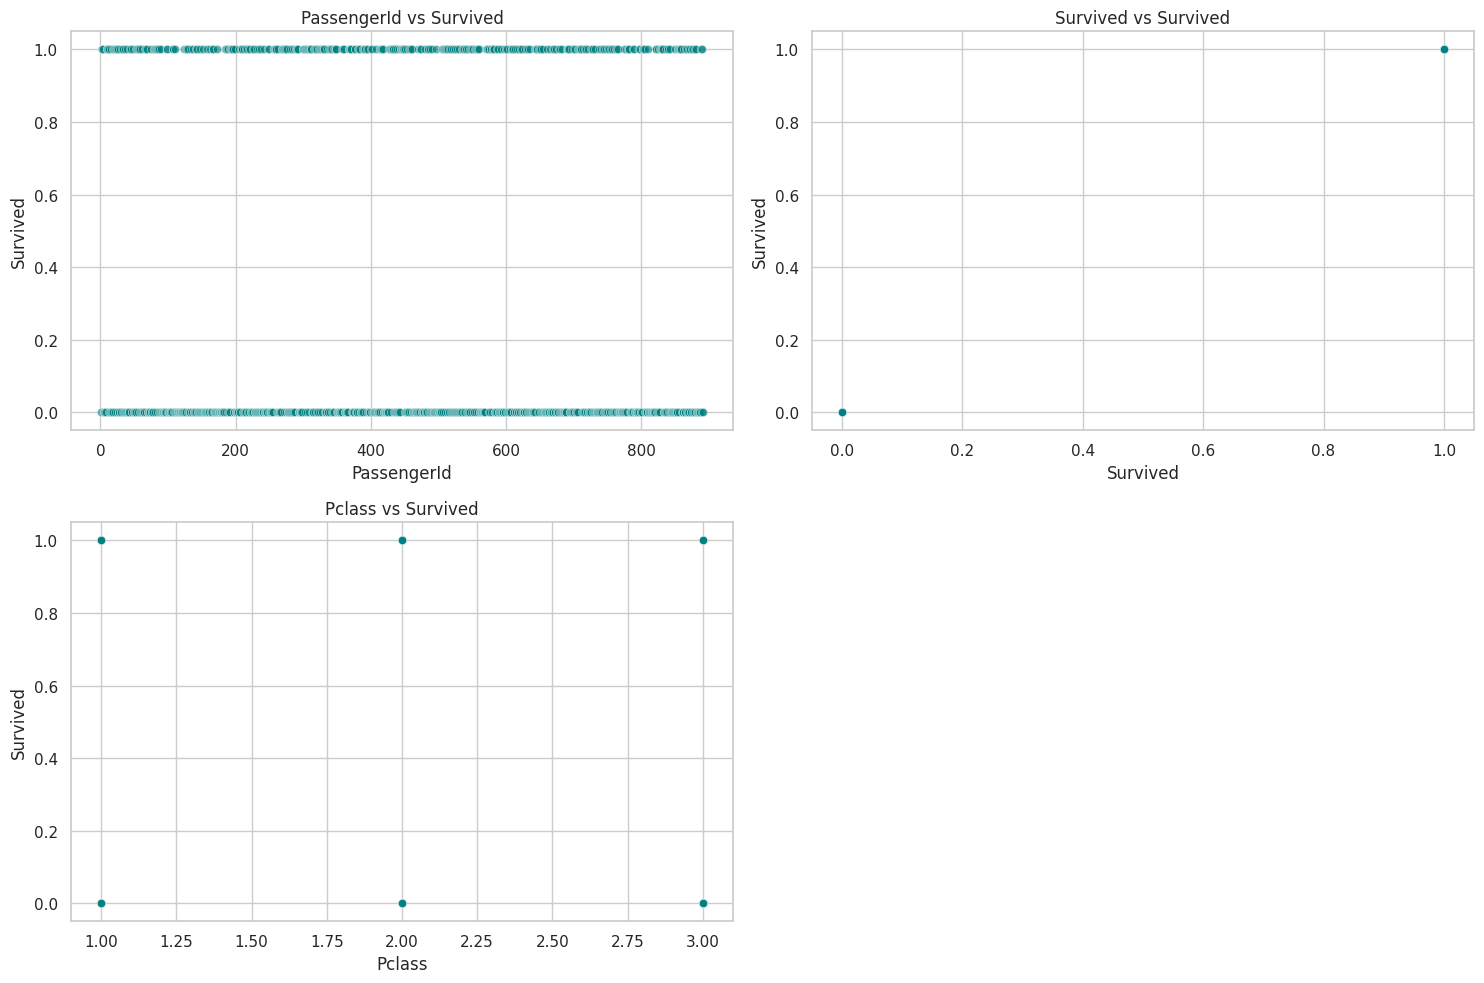

In [24]:
# Define important features for bivariate analysis
important_features = ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

#  Scatter Plots (continuous feature vs. Survived)
#  quality should be converted to float to visualize scatter

plt.figure(figsize=(15, 10))
for i, feature in enumerate(important_features[:3]):  # Plot 3 scatter plots
    plt.subplot(2, 2, i+1)
    sns.scatterplot(x=df_copy[feature], y=df_copy['Survived'], alpha=0.6, color='teal')
    plt.title(f'{feature} vs Survived')
    plt.xlabel(feature)
    plt.ylabel('Survived')
plt.tight_layout()
plt.show()


PassengerId vs Survived: This scatter plot shows 'PassengerId' on the x-axis and 'Survived' on the y-axis. Since 'PassengerId' is just a unique identifier and 'Survived' only has two values (0 or 1), this plot doesn't reveal any meaningful patterns or relationships. It simply shows that for each passenger ID, they either survived (1) or did not survive (0).

Survived vs Survived: This scatter plot is essentially plotting the 'Survived' column against itself. It will show two horizontal lines of points, one at y=0 (for those who did not survive) and one at y=1 (for those who survived). This plot is not useful for gaining insights into the data as it only visualizes the distribution of the target variable itself, not its relationship with other features.

Pclass vs Survived: This scatter plot shows 'Pclass' on the x-axis (1, 2, or 3) and 'Survived' on the y-axis (0 or 1). This plot is more informative. You can observe clusters of points at the 'Survived' levels for each 'Pclass'. It can visually suggest if there's a tendency for passengers in certain classes to have a higher or lower survival rate. For example, if you see more points at y=1 for Pclass 1 compared to Pclass 3, it would indicate a higher survival rate for first-class passengers.

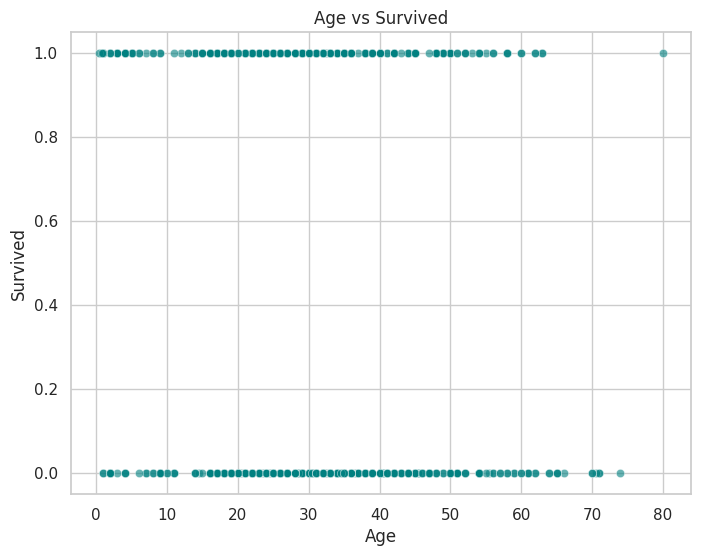

In [25]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_copy['Age'], y=df_copy['Survived'], alpha=0.6, color='teal')
plt.title('Age vs Survived')
plt.xlabel('Age')
plt.ylabel('Survived')
plt.show()

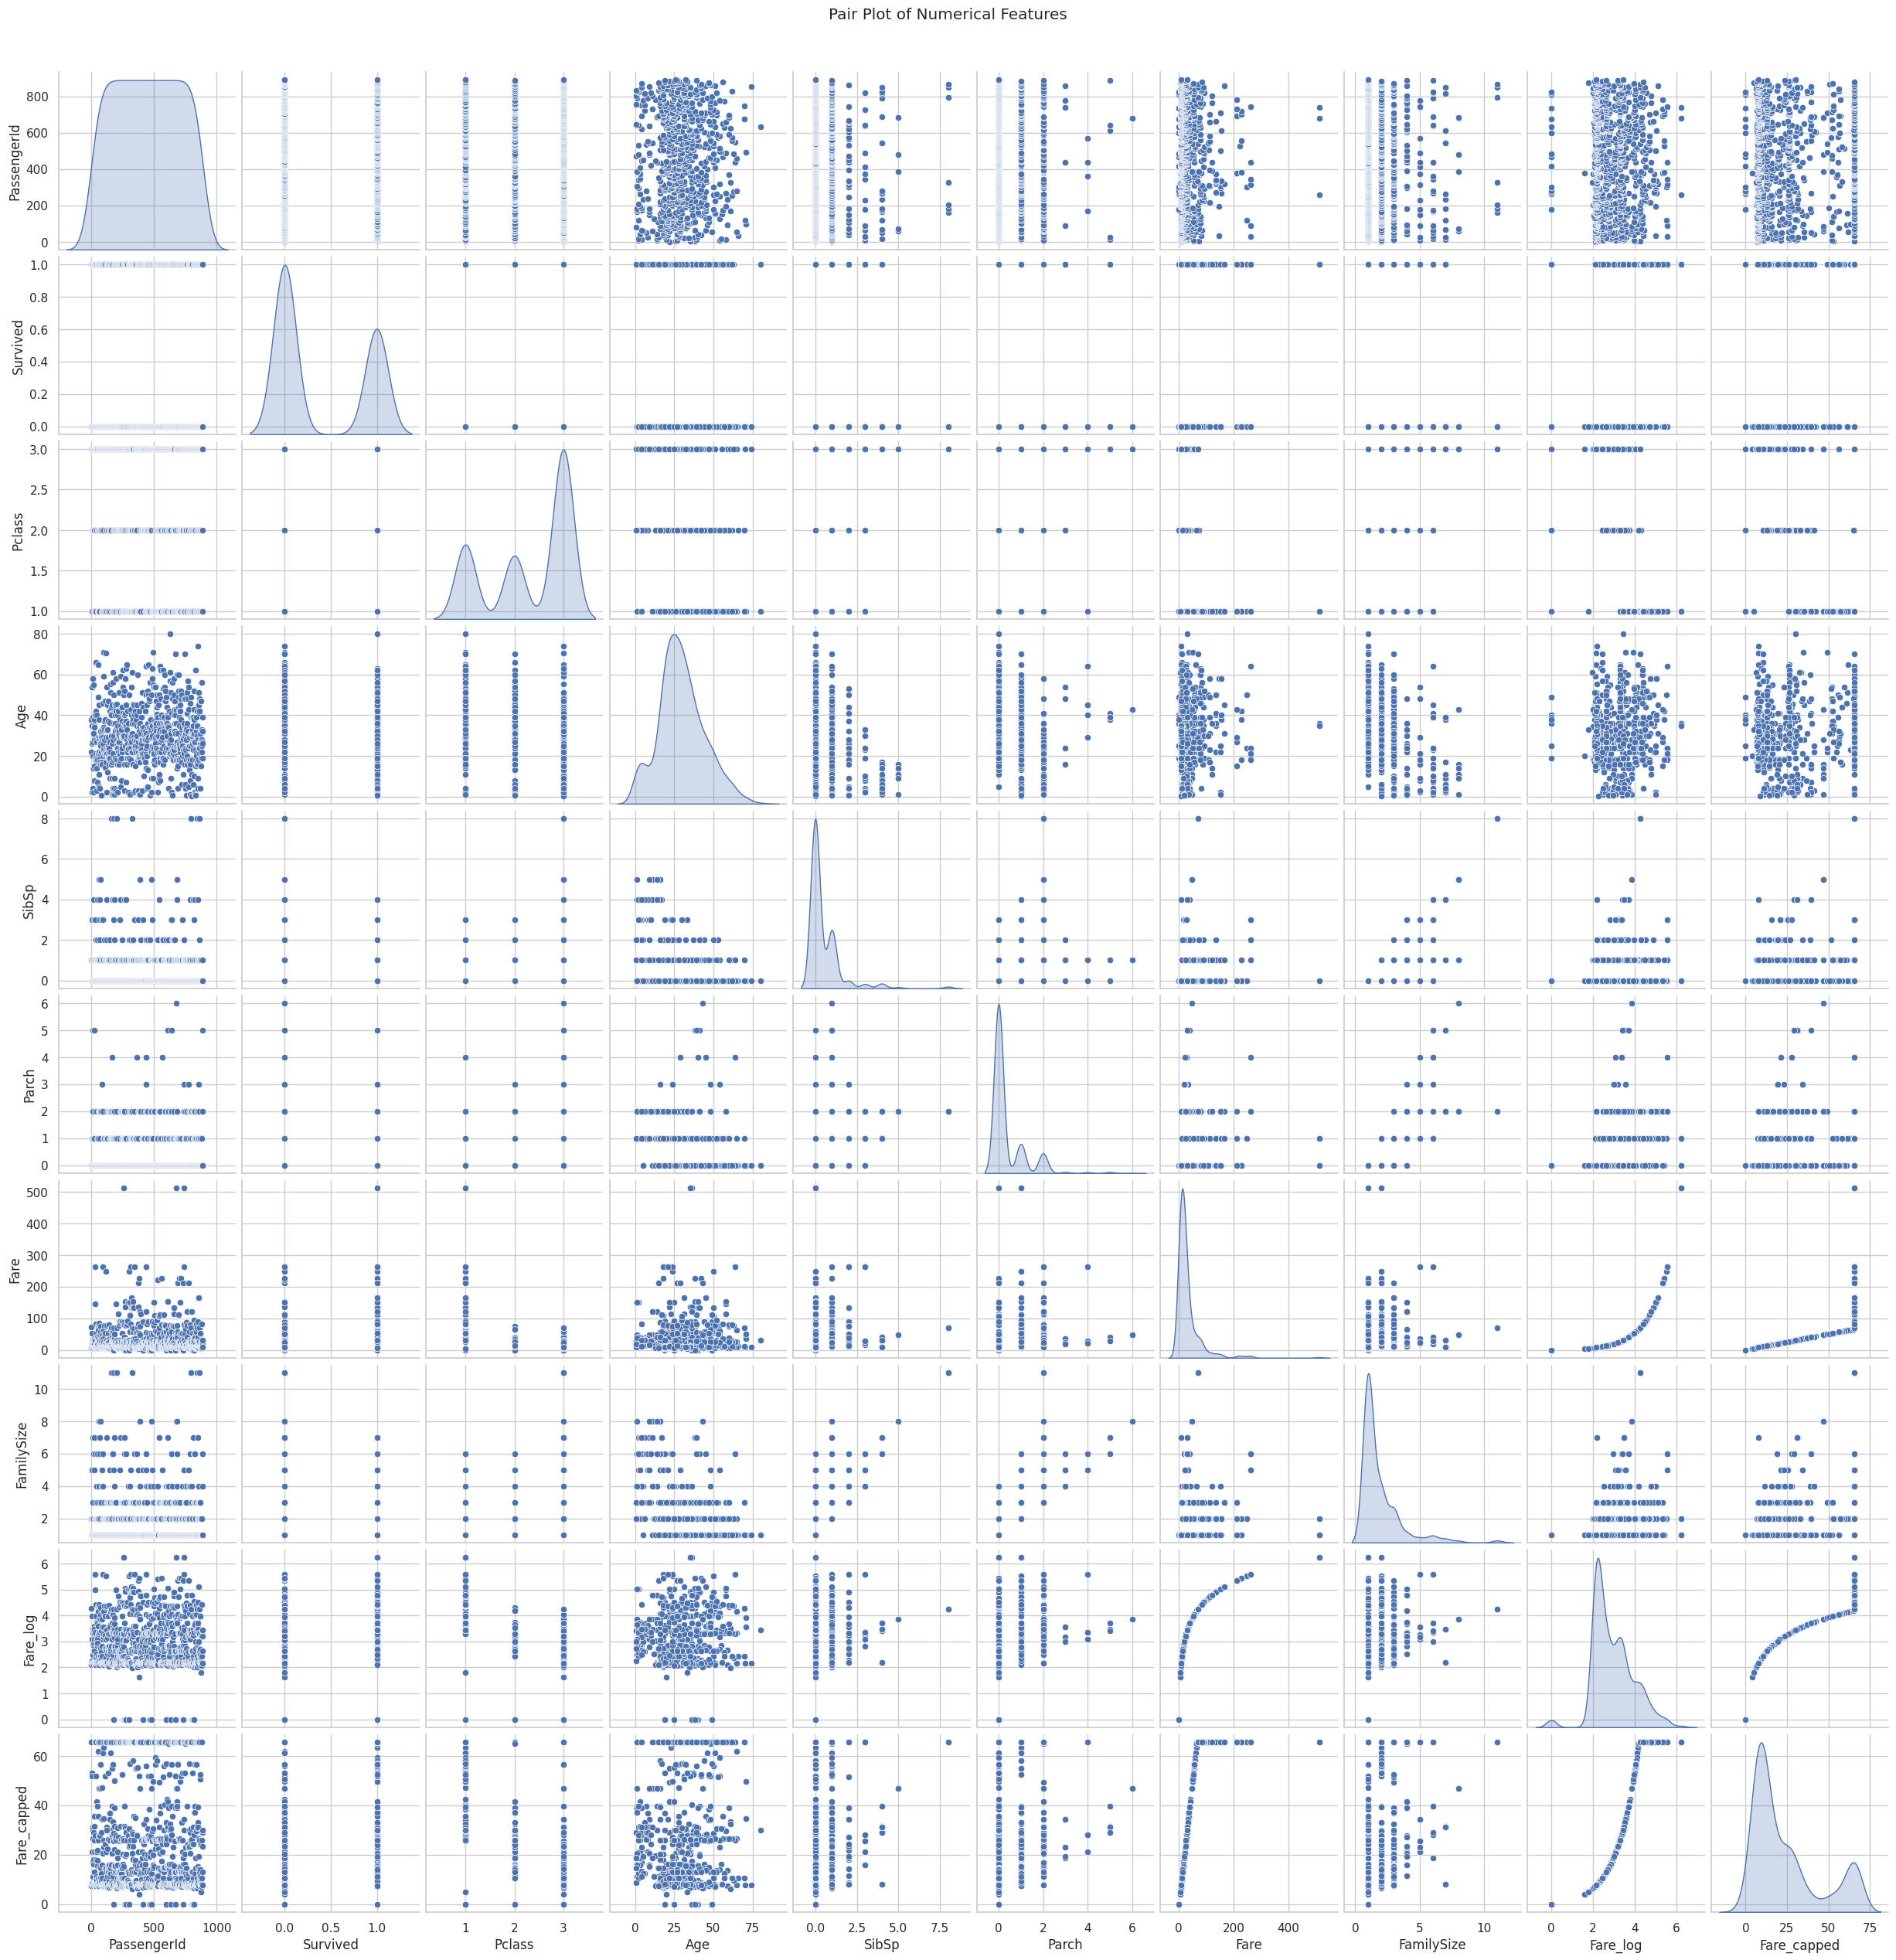

In [26]:
# Select only numerical columns for the pair plot
numerical_cols = df_copy.select_dtypes(include=np.number).columns

# Generate the pair plot
sns.pairplot(df_copy[numerical_cols], diag_kind='kde')
plt.suptitle('Pair Plot of Numerical Features', y=1.02) # Add a title for the entire plot
plt.show()

Diagonal Plots: The plots along the diagonal line (from top-left to bottom-right) are density plots (specifically, Kernel Density Estimates because you used diag_kind='kde'). Each of these plots shows the distribution of a single numerical feature. For example, the first plot on the diagonal shows the distribution of 'PassengerId', the second shows the distribution of 'Survived', and so on. These plots help you see the shape of the distribution for each variable (e.g., whether it's skewed, has multiple peaks, etc.).

Off-Diagonal Plots: The plots that are not on the diagonal are scatter plots. Each of these plots shows the relationship between two different numerical features.
The variable on the x-axis is determined by the column of the grid the plot is in.
The variable on the y-axis is determined by the row of the grid the plot is in.

For example, the scatter plot in the second row and first column shows the relationship between 'PassengerId' (on the x-axis) and 'Survived' (on the y-axis). The scatter plot in the first row and second column shows the relationship between 'Survived' (on the x-axis) and 'PassengerId' (on the y-axis).
By looking at these scatter plots,  Can visually identify if there are linear relationships, non-linear relationships, clusters of data points, or no apparent relationship between pairs of features.

BUILDING AND EVALUATING CLASSIFICATION MODEL

### Handle Missing Values

In [27]:
# Handle missing values in 'Age' - Impute with the median
df_copy['Age'].fillna(df_copy['Age'].median(), inplace=True)

# Handle missing values in 'Embarked' - Impute with the mode
df_copy['Embarked'].fillna(df_copy['Embarked'].mode()[0], inplace=True)

# Handle missing values in 'Cabin' - Since there are many missing values,
# we can either drop the column or create a new feature indicating if a cabin was recorded.
# Let's create a new binary feature 'Has_Cabin'.
df_copy['Has_Cabin'] = df_copy['Cabin'].apply(lambda x: 0 if pd.isna(x) else 1)

# Drop the original 'Cabin' column as it has too many missing values
df_copy.drop('Cabin', axis=1, inplace=True)

# Verify that there are no more missing values
print("Missing values after handling:")
print(df_copy.isnull().sum())

Missing values after handling:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
FamilySize     0
Title          0
Fare_log       0
Fare_capped    0
Has_Cabin      0
dtype: int64


<ipython-input-27-3162497246>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy['Age'].fillna(df_copy['Age'].median(), inplace=True)
<ipython-input-27-3162497246>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

### Encode Categorical Features

In [28]:
# Encode Categorical Features
# Use one-hot encoding for 'Sex', 'Embarked', and 'Title'
df_copy = pd.get_dummies(df_copy, columns=['Sex', 'Embarked', 'Title'], drop_first=True)

# Display the first few rows to see the new encoded columns
display(df_copy.head())

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,FamilySize,...,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,2,...,False,False,False,False,False,True,False,False,False,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,2,...,False,False,False,False,False,False,True,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1,...,False,False,True,False,False,False,False,False,False,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,2,...,False,False,False,False,False,False,True,False,False,False
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,...,False,False,False,False,False,True,False,False,False,False


In [29]:
# Select features (X) and target (y)
# Drop irrelevant columns and the original 'Fare' column (since we have 'Fare_capped' and 'Fare_log')
X = df_copy.drop(['Survived', 'PassengerId', 'Name', 'Ticket', 'Fare'], axis=1)
y = df_copy['Survived']

print("Features (X):")
display(X.head())
print("\nTarget (y):")
display(y.head())

Features (X):


,Pclass,Age,SibSp,Parch,FamilySize,Fare_log,Fare_capped,Has_Cabin,Sex_male,Embarked_Q,...,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir
0,3,22.0,1,0,2,2.110213,7.2500,0,True,False,...,False,False,False,False,False,True,False,False,False,False
1,1,38.0,1,0,2,4.280593,65.6344,1,False,False,...,False,False,False,False,False,False,True,False,False,False
2,3,26.0,0,0,1,2.188856,7.9250,0,False,False,...,False,False,True,False,False,False,False,False,False,False
3,1,35.0,1,0,2,3.990834,53.1000,1,False,False,...,False,False,False,False,False,False,True,False,False,False
4,3,35.0,0,0,1,2.202765,8.0500,0,True,False,...,False,False,False,False,False,True,False,False,False,False



Target (y):


,Survived
0,0
1,1
2,1
3,1
4,0


In [32]:
# Save the updated DataFrame to a CSV file
df_copy.to_csv('df_new_train.csv', index=False)

TRAINING,TESTING AND INFERENCE

In [30]:
# 1. Separate features and target variable
num_cols = df_copy.select_dtypes(include=['float64', 'int64']).columns
X = df_copy[num_cols]
y = df_copy['Survived']

# 2. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Display the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (712, 11)
Shape of X_test: (179, 11)
Shape of y_train: (712,)
Shape of y_test: (179,)


In [33]:
X_train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,Fare_log,Fare_capped,Has_Cabin
331,332,0,1,45.5,0,0,28.5000,1,3.384390,28.5000,1
733,734,0,2,23.0,0,0,13.0000,1,2.639057,13.0000,0
382,383,0,3,32.0,0,0,7.9250,1,2.188856,7.9250,0
704,705,0,3,26.0,1,0,7.8542,2,2.180892,7.8542,0
813,814,0,3,6.0,4,2,31.2750,7,3.474293,31.2750,0


In [34]:
y_train


,Survived
331,0
733,0
382,0
704,0
813,0
...,...
106,1
270,0
860,0
435,1


In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
label_encoder = LabelEncoder()


X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

Model Selection and Training

Classification model

Logistic Regression
K-Nearest Neighbors
Decision Tree Classifier
Random Forest Classifier
Support Vector Machine Classifier

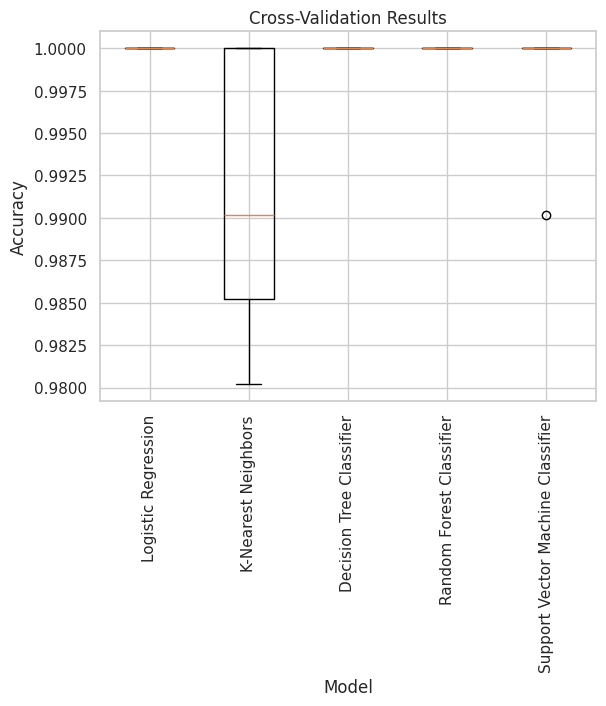

In [36]:
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "Support Vector Machine Classifier": SVC()
}


#Creating a list that will hold cross-validation scores of all models
results = []

#Creating a KFold object
#This performs training and validation for a same model for 7 times
#Every time, the validation data changes.
kf = KFold(n_splits=7, random_state=42, shuffle=True)

# Loop through the models' values
for model in models.values():

  # Perform cross-validation
  cv_scores = cross_val_score(model, X_train_scaled, y_train_encoded, cv=kf, scoring='accuracy')

  # Append the results
  results.append(cv_scores)

# Create a box plot of the results
plt.boxplot(results, tick_labels=models.keys())
plt.title("Cross-Validation Results")
plt.xlabel("Model")
plt.xticks(rotation=90)
plt.ylabel("Accuracy")
plt.show()

This code helps us to compare the performance of different classification models on your training data using cross-validation. The box plot visually summarizes the accuracy of each model across different folds, allowing you to see the median accuracy, the spread of scores, and any outliers.

Comparing the accuracy of all models, we confirm that Decision Tree Classifier has the heighest accuracy on our training dataset.

Let's test our models using the testing dataset.

In [37]:
test_mse = {}
for name, model in models.items():

  # Fit the model to the training data
  model.fit(X_train_scaled,y_train_encoded)

  # Make predictions on the test set
  y_pred = model.predict(X_test_scaled)

  # Calculate the test accuracy
  test_accuracy = accuracy_score(y_test_encoded, y_pred)

  # Store the test accuracy in the dictionary
  test_mse[name] = test_accuracy
  print(f"{name} test accuracy: {test_accuracy}")


Logistic Regression test accuracy: 1.0
K-Nearest Neighbors test accuracy: 0.994413407821229
Decision Tree Classifier test accuracy: 1.0
Random Forest Classifier test accuracy: 1.0
Support Vector Machine Classifier test accuracy: 0.994413407821229


Interpretability: Decision trees are relatively easy to understand and visualize. You can follow the tree's branches to see how decisions are made based on the features.
Handles both numerical and categorical data: Decision trees can work with both types of data, although in your case, you've already encoded categorical features.
Requires less data preprocessing: Compared to some other algorithms (like SVMs or Logistic Regression), decision trees are less sensitive to feature scaling and can handle non-linear relationships.
Can capture complex patterns: Decision trees can learn complex decision boundaries in the data.

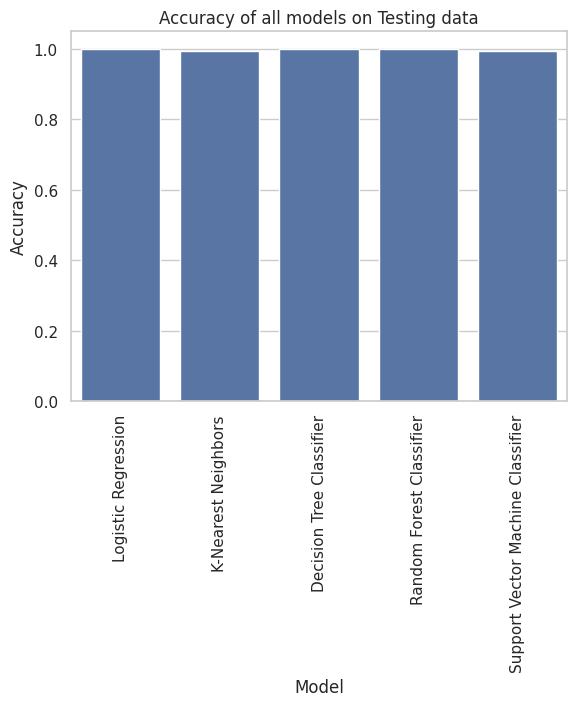

In [38]:
#bar graph to show mse of all models

sns.barplot(x=list(models.keys()), y=test_mse.values())
plt.title("Accuracy of all models on Testing data")
plt.xlabel("Model")
plt.xticks(rotation=90)
plt.ylabel("Accuracy")
plt.show()

In [39]:
#Create the decision tree classifier model
baseline_model = DecisionTreeClassifier()

#Fit the model to the training data
baseline_model.fit(X_train_scaled, y_train_encoded)

#Make predictions on the test set
y_pred = baseline_model.predict(X_test_scaled)



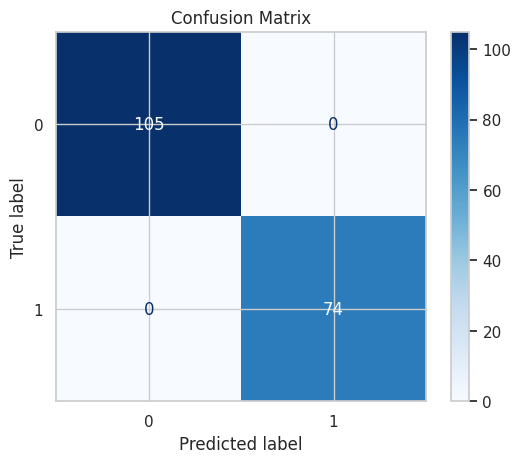

In [40]:
#Visualizing in confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


True Positives (Top-Left): The number of passengers who actually survived (1) and were correctly predicted as survived (1).

True Negatives (Bottom-Right): The number of passengers who did not survive (0) and were correctly predicted as not survived (0).

False Positives (Top-Right): The number of passengers who did not survive (0) but were incorrectly predicted as survived (1). This is also known as a Type I error.

False Negatives (Bottom-Left): The number of passengers who actually survived (1) but were incorrectly predicted as not survived (0). This is also known as a Type II error.

In [41]:
# Calculating Evaluation Metrics
accuracy = accuracy_score(y_test_encoded, y_pred)
precision = precision_score(y_test_encoded, y_pred, average='weighted')
recall = recall_score(y_test_encoded, y_pred, average='weighted')
f1 = f1_score(y_test_encoded, y_pred, average='weighted')

# Evaluation Metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (weighted): {precision:.4f}")
print(f"Recall (weighted): {recall:.4f}")
print(f"F1-score (weighted): {f1:.4f}")
print("\n"+"="*30+"\n")
print(f"Model is {accuracy*100:.4f}% accurate.")
print("\n"+"="*30)
print(classification_report(y_test_encoded, y_pred))


Accuracy: 1.0000
Precision (weighted): 1.0000
Recall (weighted): 1.0000
F1-score (weighted): 1.0000


Model is 100.0000% accurate.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00        74

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



In [42]:
import pickle

# Assume `baseline_model` is your trained SVR model
filename = "test_baseline_model.pkl"

# Save the model to disk
with open(filename, 'wb') as file:
    pickle.dump(baseline_model, file)

print(f"Model saved to {filename}")


Model saved to test_baseline_model.pkl


Tuning HyperParameters


In [43]:
from sklearn.model_selection import RandomizedSearchCV



In [44]:
#defining the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(5,55,5),
    'min_samples_split': np.arange(2,10,1),
    'min_samples_leaf': np.arange(1,10),
    'max_features': [None, 'sqrt', 'log2']
}


In [45]:
dtc_cv = RandomizedSearchCV(baseline_model, param_grid, cv=kf, n_jobs=-1, verbose=1, n_iter=100)

In [46]:
dtc_cv.fit(X_train_scaled, y_train_encoded)

Fitting 7 folds for each of 100 candidates, totalling 700 fits


RandomizedSearchCV(cv=KFold(n_splits=7, random_state=42, shuffle=True),
                   estimator=DecisionTreeClassifier(), n_iter=100, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]),
                                        'max_features': [None, 'sqrt', 'log2'],
                                        'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])},
                   verbose=1)

In [47]:
#Printing the tuned parameters and validation score
print("Tuned paramaters: {}".format(dtc_cv.best_params_))
print("Tuned score: {}".format(dtc_cv.best_score_))


Tuned paramaters: {'min_samples_split': np.int64(7), 'min_samples_leaf': np.int64(4), 'max_features': None, 'max_depth': np.int64(50), 'criterion': 'entropy'}
Tuned score: 1.0


In [48]:
#Get the tuned model
tuned_model = dtc_cv.best_estimator_

In [49]:
tuned_model

DecisionTreeClassifier(criterion='entropy', max_depth=np.int64(50),
                       min_samples_leaf=np.int64(4),
                       min_samples_split=np.int64(7))

DecisionTreeClassifier is configured to use the 'entropy' criterion for splitting, allows a maximum depth of 30, and requires at least 3 samples in both leaf nodes and nodes that are split. These specific values were found by RandomizedSearchCV to yield the best performance based on your cross-validation setup.

In [50]:
#Make predictions on the test set using the tuned model
y_pred_tuned = tuned_model.predict(X_test_scaled)


The tuned Decision Tree Classifier is able to find out the relationship between the passenger features in your dataset and their survival outcome.

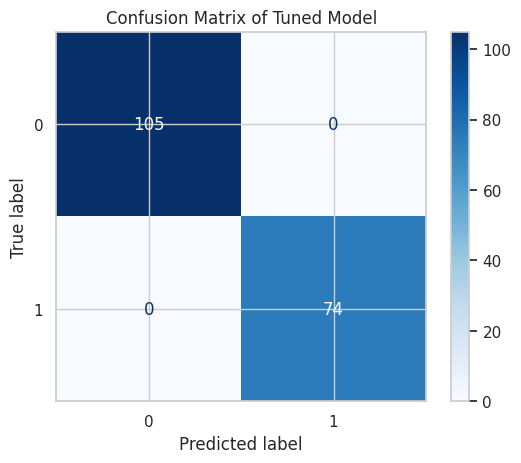

In [51]:
#Visualizing in confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred_tuned)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix of Tuned Model")
plt.show()

In [52]:
# Calculating Evaluation Metrics
accuracy = accuracy_score(y_test_encoded, y_pred_tuned)
precision = precision_score(y_test_encoded, y_pred_tuned, average='weighted')
recall = recall_score(y_test_encoded, y_pred_tuned, average='weighted')
f1 = f1_score(y_test_encoded, y_pred_tuned, average='weighted')

# Evaluation Metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (weighted): {precision:.4f}")
print(f"Recall (weighted): {recall:.4f}")
print(f"F1-score (weighted): {f1:.4f}")
print("\n"+"="*30+"\n")
print(f"Model is {accuracy*100:.4f}% accurate.")
print("\n"+"="*30)
print(classification_report(y_test_encoded, y_pred_tuned))

Accuracy: 1.0000
Precision (weighted): 1.0000
Recall (weighted): 1.0000
F1-score (weighted): 1.0000


Model is 100.0000% accurate.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00        74

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



In [54]:
with open('test_tuned_model.pkl', 'wb') as f:
    pickle.dump(tuned_model, f) # Changed svr_tuned to tuned_model

print("Tuned Decision Tree model saved as 'test_tuned_model.pkl'") # Updated print message

Tuned Decision Tree model saved as 'test_tuned_model.pkl'
